# Evaluation

In [22]:
import pandas as pd
result = pd.read_parquet(
    "/home/loebbert/projects/deepclustering/LMU_Master_Practical_SoSe24/practical/DeepClustering/DipECT/results/MNIST_CLUSTPY_STANDARD_10_DIPECT_42.pq"
)
result

,autoencoder,embedding_dim,dataset,method,nmi,acc,ari,nmi-kmeans,acc-kmeans,ari-kmeans,dp,lp,seed
0,ClustPy FeedForward,10,MNIST,DipECT,0.823955,0.887129,0.788656,0.728194,0.788129,0.65553,0.792961,0.924457,42


## Imports

In [1]:
import sys
import os

repo_path = os.path.sep.join(os.getcwd().split(os.path.sep)[:-3])
sys.path.append(repo_path)
print(repo_path)
# solves problems for Mac Users
os.chdir(repo_path)


/home/schilcherj/master/deepClustering/LMU_Master_Practical_SoSe24


In [3]:
%load_ext autoreload
%autoreload 2

import random
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from clustpy.data.real_torchvision_data import load_mnist, load_usps, load_fmnist, load_cifar10
from clustpy.deep.autoencoders import FeedforwardAutoencoder, ConvolutionalAutoencoder

from practical.DeepClustering.DipECT.dipect import DipECT
from practical.DeepClustering.DipECT.evaluation_pipeline import DatasetType, AutoencoderType, get_dataset

from practical.DeepClustering.DipECT.metrics_visualization import (
    visualize_peformance_AE, 
    load_results, 
    show_augmented_data, 
    build_and_visualize_splitindex_tree, 
    build_and_visualize_tree, 
    visualize_prediction_subclusters, 
    visualize_tree_growth_step, 
    plot_mean_metrics
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preliminary setting

### Visualizing pretrained autoencoders

##### MNIST

In [ ]:


dataset = get_dataset(DatasetType.MNIST)
data = dataset["data"]
labels = dataset["target"]
visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/MNIST_autoencoder_10_pretrained_21.pth",
    AutoencoderType.CLUSTPY_STANDARD,
    dataset,
    (28, 28),
    4,
    seed=21,
), visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/MNIST_stacked_ae_10_pretrained_21.pth",
    AutoencoderType.DEEPECT_STACKED_AE,
    dataset,
    (28, 28),
    4,
    seed=21,
)

##### USPS

In [ ]:
dataset = get_dataset(DatasetType.USPS)
data = dataset["data"]
labels = dataset["target"]
visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/USPS_autoencoder_10_pretrained_21.pth",
    AutoencoderType.CLUSTPY_STANDARD,
    dataset,
    (16, 16),
    4,
    seed=21,
), 
visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/USPS_stacked_ae_10_pretrained_21.pth",
    AutoencoderType.DEEPECT_STACKED_AE,
    dataset,
    (16, 16),
    4,
    seed=21,
)

##### FMNIST

In [ ]:
dataset = get_dataset(DatasetType.FASHION_MNIST)
data = dataset["data"] 
labels = dataset["target"]
visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/FashionMNIST_autoencoder_10_pretrained_21.pth",
    AutoencoderType.CLUSTPY_STANDARD,
    dataset,
    (28, 28),
    4,
    seed=21,
), visualize_peformance_AE(
    "practical/DeepClustering/DipECT/pretrained_autoencoders/FashionMNIST_stacked_ae_10_pretrained_21.pth",
    AutoencoderType.DEEPECT_STACKED_AE,
    dataset,
    (28, 28),
    4,
    seed=21,
)

### Visualization of augmented data

##### MNIST

In [ ]:
dataset = get_dataset(DatasetType.MNIST)
data = dataset["data"]
labels = dataset["target"]
show_augmented_data(data, DatasetType.MNIST, (28, 28), 4)

##### USPS

In [ ]:
dataset = get_dataset(DatasetType.USPS)
data = dataset["data"]
labels = dataset["target"]
show_augmented_data(data, DatasetType.USPS, (16, 16), 4)

##### FMNIST

In [ ]:
dataset = get_dataset(DatasetType.FASHION_MNIST)
data = dataset["data"]
labels = dataset["target"]
show_augmented_data(data, DatasetType.FASHION_MNIST, (28,28), 4)

## DipECT Evaluation

#### MNIST

In [ ]:
dataset, labels = load_mnist(return_X_y=True)
autoencoder = FeedforwardAutoencoder([dataset.shape[1], 500, 500, 2000, 10])
autoencoder.load_state_dict(torch.load("./practical/DeepClustering/DipECT/pretrained_AE_test.pth")) #TODO: Adjust path here!
autoencoder.fitted = True

dipect = DipECT(autoencoder=autoencoder, grow_interval=2, max_epochs=45, pruning_threshold=0.01, consider_num_assignments_for_growing=True)
dipect = dipect.fit_predict(dataset)

In [ ]:
print('MNIST:')
print('Accuracy:', dipect.tree_.flat_accuracy(labels, 10))
print('NMI:', dipect.tree_.flat_nmi(labels, 10))
print('Dendrogram Purity:', dipect.tree_.dendrogram_purity(labels))


#### USPS

In [ ]:
dataset, labels = load_usps(return_X_y=True)
autoencoder = FeedforwardAutoencoder([dataset.shape[1], 500, 500, 2000, 10])
autoencoder.load_state_dict(torch.load("./practical/DeepClustering/DipECT/pretrained_AE_usps.pth"))
autoencoder.fitted = True

dipect = DipECT(autoencoder=autoencoder, grow_interval=2, max_epochs=100, pruning_threshold=0.01, consider_num_assignments_for_growing=True)
dipect = dipect.fit_predict(dataset)

In [ ]:
print('Fashion USPS:')
print('Accuracy:', dipect.tree_.flat_accuracy(labels, 10))
print('NMI:', dipect.tree_.flat_nmi(labels, 10))
print('Dendrogram Purity:', dipect.tree_.dendrogram_purity(labels))


#### Fashion-MNIST

In [ ]:
dataset, labels = load_fmnist(return_X_y=True)
autoencoder = FeedforwardAutoencoder([dataset.shape[1], 500, 500, 2000, 10])
autoencoder.load_state_dict(torch.load("./practical/DeepClustering/DipECT/pretrained_AE_fmnist.pth"))
autoencoder.fitted = True

dipect = DipECT(autoencoder=autoencoder, grow_interval=2, max_epochs=45, pruning_threshold=0.01, consider_num_assignments_for_growing=True)
dipect = dipect.fit_predict(dataset)

In [ ]:
print('Fashion MNIST:')
print('Accuracy:', dipect.tree_.flat_accuracy(labels, 10))
print('NMI:', dipect.tree_.flat_nmi(labels, 10))
print('Dendrogram Purity:', dipect.tree_.dendrogram_purity(labels))


#### CIFAR10

In [20]:
# Load CIFAR-10 dataset
dataset, labels = load_cifar10(return_X_y=True)
print(dataset.shape)

dataset = dataset.reshape(-1, 32, 32, 3).astype('float32')
dataset = dataset.transpose((0, 3, 1, 2))  # Transpose to (60000, 3, 32, 32)

dataset = dataset / 255.0


autoencoder = ConvolutionalAutoencoder(32, [512,128])
autoencoder.fitted = False
dipect = DipECT(autoencoder=autoencoder,  pruning_threshold=0.01,autoencoder_param_path="./practical/DeepClustering/DipECT/CIFAR10_autoencoder_10_pretrained_21.pth")
dipect = dipect.fit_predict(dataset, labels)
# autoencoder.compile(optimizer=Adam(), loss='mse')




Files already downloaded and verified
Files already downloaded and verified
(60000, 3072)
Autoencoder is not fitted yet, will be pretrained.


KeyboardInterrupt: 

### Axis Visualization

#### For 2 clusters

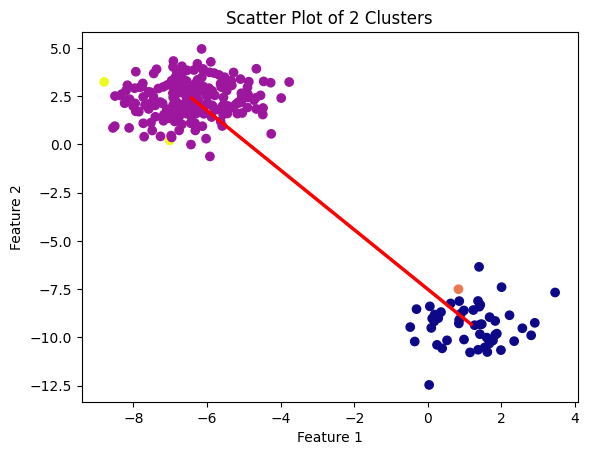

In [57]:
X1, y1 = make_blobs(n_samples=50, centers=1,)
X2, y2 = make_blobs(n_samples=200, centers=1, )
visualize_prediction_subclusters(X1, X2, y1, y2)

#### After tree growth

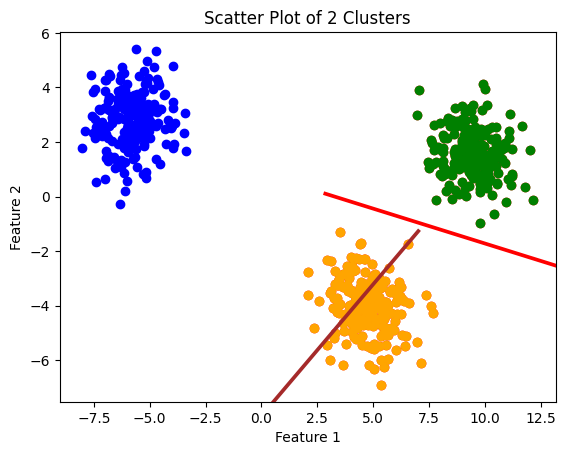

In [81]:
X, _ = make_blobs(n_samples=600, centers=3)
visualize_tree_growth_step(X)

### Tree Visualization

#### Splitindex Tree

In [ ]:
build_and_visualize_splitindex_tree(dipect.tree_.root)

#### Image Tree

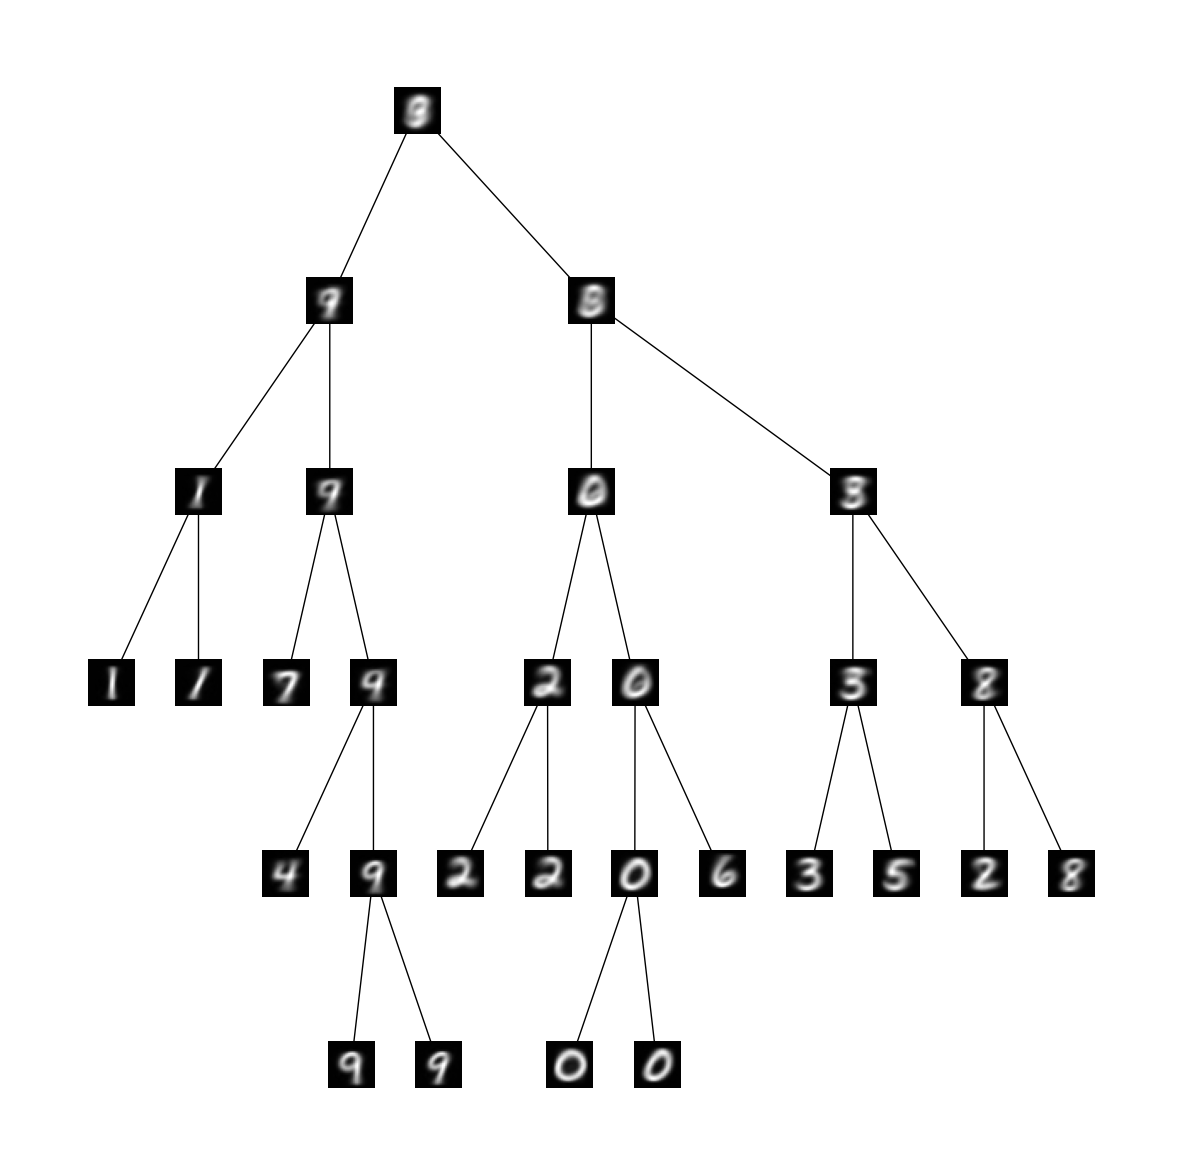

In [44]:
build_and_visualize_tree(dipect.tree_.root, dipect.autoencoder, dataset, (28,28))

## Results

In [ ]:
(
    flat_results,
    flat_combined,
    flat_results_html,
    hierarchical_results,
    hierarchical_combined,
    hierarchical_results_html,
) = load_results()

### DipECT Only

In [ ]:
deepect_filtered = flat_combined[flat_combined["method"].str.startswith("DeepECT")]

### Flat Results Comparison

In [ ]:
flat_results_html

### Hierarchical Results Comparison

In [ ]:
hierarchical_results_html